In [28]:
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
from rosbags.rosbag2 import Reader
from rosbags.serde import deserialize_cdr
from rosbags.highlevel import AnyReader

import numpy as np

In [60]:
bag_path = Path('../../../datasets/odometry_data/exp2')
topic_name = '/monica/localization_poses'


poses_data = {
    'timestamp': [],
    'time_sec': [],
    'position': {
        'x': [],
        'y': [],
        'z': []
    },
    'orientation': {
        'x': [],
        'y': [],
        'z': [],
        'w': []
    },
    'covariance': []
}
    
with AnyReader([bag_path]) as reader:
    # Print bag info
    print(f"Bag duration: {reader.duration / 1e9:.2f} seconds")
    print(f"Message count: {reader.message_count}")

    connection = [x for x in reader.connections if x.topic == topic_name]

    
    # Read messages
    for connection, timestamp, rawdata in reader.messages(connections=connection):
        msg = reader.deserialize(rawdata, connection.msgtype)
        
        # Extract pose data
        poses_data['timestamp'].append(timestamp)
        poses_data['time_sec'].append(timestamp / 1e9)

        poses_data['position']['x'].append(msg.pose.pose.position.x)
        poses_data['position']['y'].append(msg.pose.pose.position.y)
        poses_data['position']['z'].append(msg.pose.pose.position.z)
        
        poses_data['orientation']['x'].append(msg.pose.pose.orientation.x)
        poses_data['orientation']['y'].append(msg.pose.pose.orientation.y)
        poses_data['orientation']['z'].append(msg.pose.pose.orientation.z)
        poses_data['orientation']['w'].append(msg.pose.pose.orientation.w)
        
        poses_data['covariance'].append(msg.pose.covariance)

poses_data['covariance'] = np.array(poses_data['covariance'])
print(f"Read {len(poses_data)} pose messages")

Bag duration: 27.43 seconds
Message count: 28
Read 5 pose messages


In [64]:
print(poses_data['covariance'][:, 0])

[5.00000000e-10 5.00000000e-10 5.00000000e-10 5.00000000e-10
 5.00000000e-10 5.00000000e-10 1.49999888e-09 1.49999888e-09
 2.49999776e-09 2.49999776e-09 3.49999666e-09 3.49999666e-09
 4.49999554e-09 5.49999451e-09 6.49999337e-09 7.49999225e-09
 8.49999116e-09 9.49999016e-09 9.49999016e-09 1.04999890e-08
 1.14999880e-08 1.24999870e-08 1.34999859e-08 1.34999859e-08
 1.44999848e-08 1.44999848e-08 1.44999848e-08 1.44999848e-08]


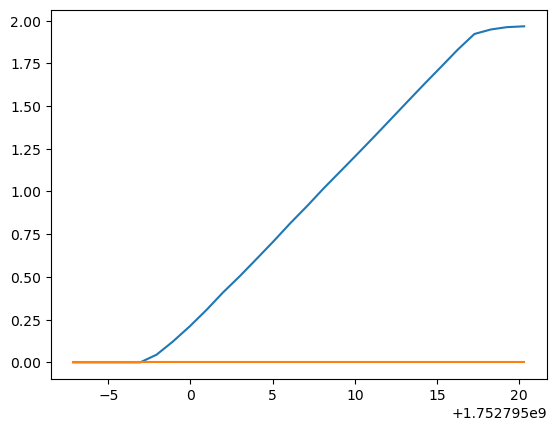

In [65]:
plt.plot(
    poses_data['time_sec'],
    poses_data['position']['x']
)
plt.plot(
    poses_data['time_sec'],
    poses_data['covariance'][:, 0]
)
plt.show()